# Air Quality


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#load dataset using pandas
df = pd.read_csv('AirQuality.csv')

#statistics summary of the dataset
print(df.describe())

             1990        1991        1992        1993        1994        1995  \
count  201.000000  201.000000  201.000000  201.000000  201.000000  201.000000   
mean    28.623827   28.238512   27.930971   27.696542   27.530557   27.428333   
std     16.938266   16.585073   16.337098   16.172776   16.074921   16.030914   
min      5.244134    5.234914    5.245963    5.273610    5.314186    5.364019   
25%     18.058802   17.809789   17.605098   17.359963   17.334690   17.282168   
50%     24.242921   24.168843   24.119069   23.918247   24.037553   23.815787   
75%     33.821919   33.771578   33.842970   33.405842   32.893961   32.602520   
max     89.411451   87.664376   86.265205   85.237091   84.603186   84.386643   

             1996        1997        1998        1999  ...        2011  \
count  201.000000  201.000000  201.000000  201.000000  ...  201.000000   
mean    27.480166   27.705513   27.993420   28.232923  ...   26.563968   
std     16.089613   16.289128   16.588937   16.8

## Data Cleaning


In [26]:
df = df.drop_duplicates()
# Fill missing values with the mean of each column
years = list(map(str, range(1990, 2021)))
df['Average Air Quality'] = df[years].mean(axis=1)

#showing data
print(df.head())

                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                      Indicator Name     Indicator Code  \
0  PM2.5 air pollution, mean annual exposure (mic...  EN.ATM.PM25.MC.M3   
1  PM2.5 air pollution, mean annual exposure (mic...  EN.ATM.PM25.MC.M3   
2  PM2.5 air pollution, mean annual exposure (mic...  EN.ATM.PM25.MC.M3   
3  PM2.5 air pollution, mean annual exposure (mic...  EN.ATM.PM25.MC.M3   
4  PM2.5 air pollution, mean annual exposure (mic...  EN.ATM.PM25.MC.M3   

        1990       1991       1992       1993       1994       1995  ...  \
0        NaN        NaN        NaN        NaN        NaN        NaN  ...   
1        NaN        NaN        NaN        NaN        NaN        NaN  ...   
2  64.174097  64.188153  64.210526  64

### Bar plot
Average Pollution Levels Across All Countries (1990 - 2020)

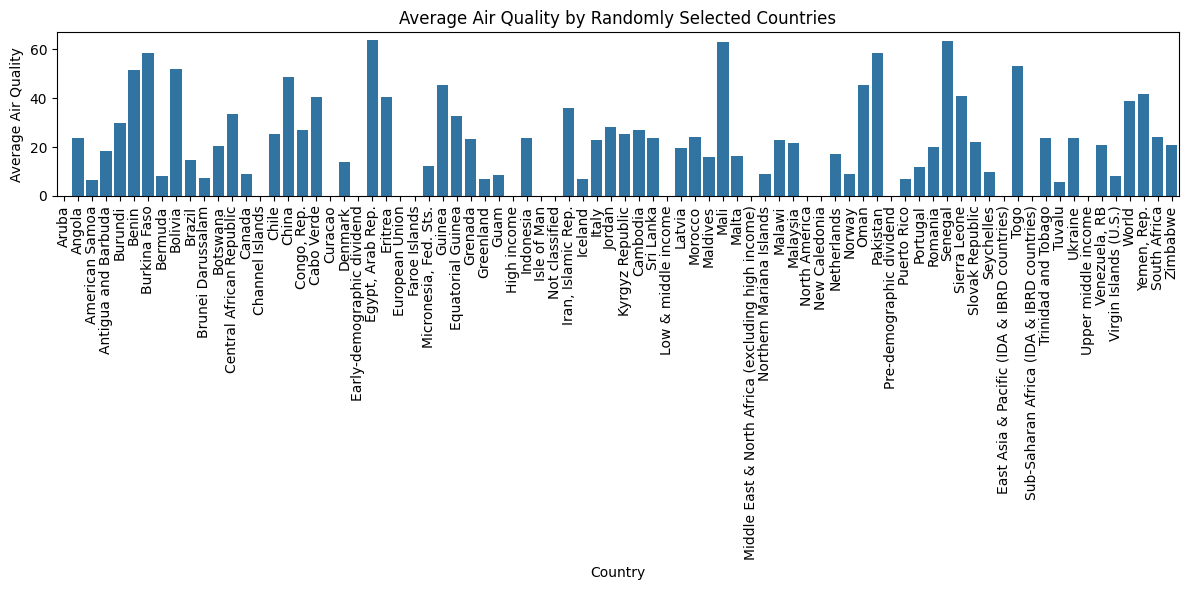

In [27]:
# Select a random sample of countries from Country Name column
sampled_countries = df['Country Name'].sample(n=80, random_state=1)  # n = 80 for best data visual
sampled_df = df[df['Country Name'].isin(sampled_countries)]

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Country Name', y='Average Air Quality', data=sampled_df)
plt.xticks(rotation=90)
plt.title('Average Air Quality by Randomly Selected Countries')
plt.xlabel('Country')
plt.ylabel('Average Air Quality')
plt.tight_layout()
plt.show()

### Line graph of air quality over the years for selected countries

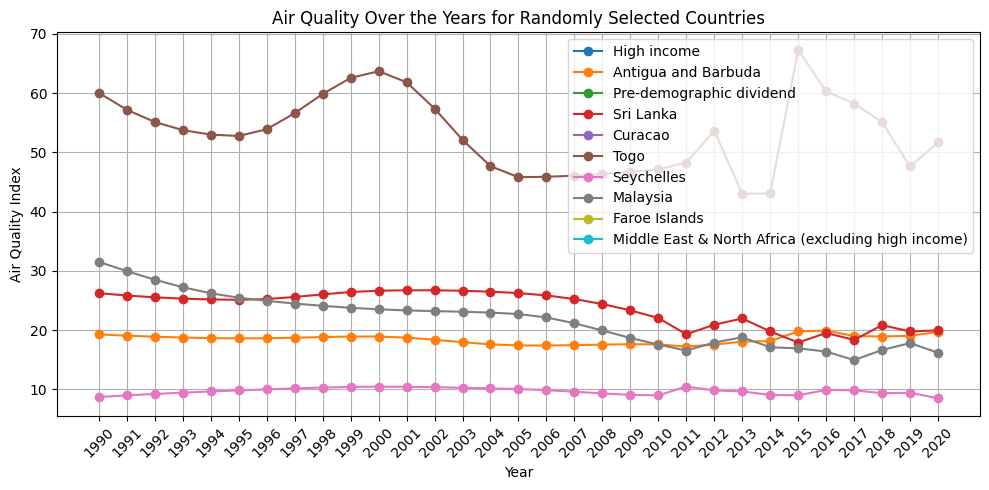

In [28]:
# Sample random countries from the dataset
sampled_countries = df['Country Name'].sample(n=10, random_state=1)  # n=10 for best data visual
sampled_df = df[df['Country Name'].isin(sampled_countries)]

# Prepare years list
years = list(map(str, range(1990, 2021)))

# Line graph of air quality over the years for selected countries
plt.figure(figsize=(10, 5))

for country in sampled_countries:
    country_data = df[df['Country Name'] == country]
    air_quality_years = country_data[years].values.flatten()
    plt.plot(years, air_quality_years, marker='o', label=country)

plt.title('Air Quality Over the Years for Randomly Selected Countries')
plt.xlabel('Year')
plt.ylabel('Air Quality Index')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


### Heatmap of the correlation matrix


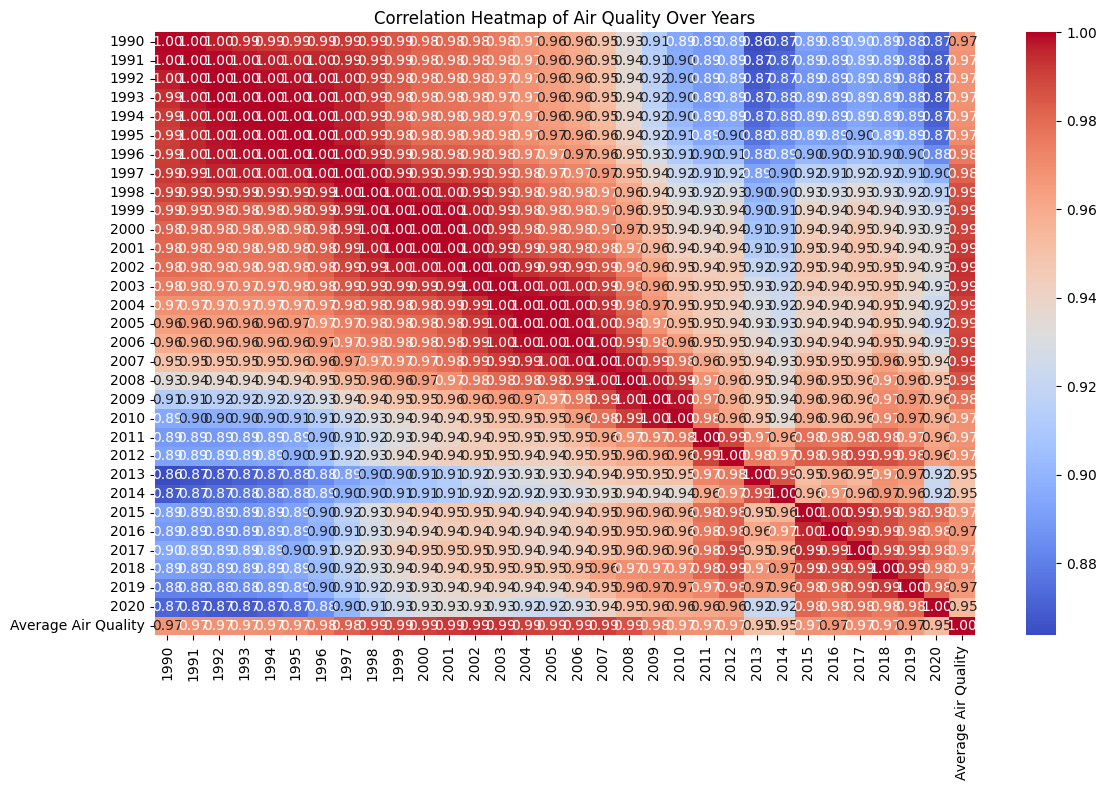

In [29]:
# Plotting the heatmap
years = df.columns[4:]
corr_matrix = df[years].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Air Quality Over Years')
plt.tight_layout()
plt.show()